In [162]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [163]:
dataset = pd.read_csv('../dataset/healthcare-dataset-stroke-data.csv')

dataset.replace( {'Male': 0,'Female':1, 'No': 0, 'Yes': 1, 'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4 }, inplace=True)
dataset.replace( {'Urban': 0, 'Rural': 1, 'formerly smoked': 1, 'never smoked': 0, 'smokes': 2, 'Unknown': 3 }, inplace=True)
dataset.drop(['Residence_type','ever_married','work_type','avg_glucose_level'], axis=1,inplace=True)
dataset.dropna(inplace=True)

features_names = ['gender','age','hypertension','heart_disease','bmi','smoking_status']
target_names = 'stroke'

target = dataset[target_names]
feature = dataset[features_names]

print(target.shape)
print(feature.shape)

print (target.value_counts())


(891,)
(891, 6)
0    682
1    209
Name: stroke, dtype: int64


In [164]:
X_train, X_test, y_train, y_test = train_test_split(
    feature,target,
    test_size=0.2,
    random_state=np.random.randint(10))

In [165]:
model = Sequential()

model.add(Dense(10, input_shape=(6,), activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [166]:
early_break = EarlyStopping(monitor='loss', patience=10)
reduce_learning_rate = ReduceLROnPlateau(patience=5)

result = model.fit(X_train, y_train, epochs = 500, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/500


2022-11-11 11:20:47.856478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 2s 17ms/step - loss: 0.6671 - accuracy: 0.7528 - val_loss: 0.6355 - val_accuracy: 0.8156
Epoch 2/500
 1/36 [..............................] - ETA: 0s - loss: 0.6246 - accuracy: 0.8500

2022-11-11 11:20:49.857758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 0s 10ms/step - loss: 0.6261 - accuracy: 0.7528 - val_loss: 0.5706 - val_accuracy: 0.8156
Epoch 3/500
36/36 [==============================] - 0s 9ms/step - loss: 0.5851 - accuracy: 0.7528 - val_loss: 0.5131 - val_accuracy: 0.8156
Epoch 4/500
36/36 [==============================] - 0s 10ms/step - loss: 0.5493 - accuracy: 0.7528 - val_loss: 0.4545 - val_accuracy: 0.8156
Epoch 5/500
36/36 [==============================] - 0s 10ms/step - loss: 0.5171 - accuracy: 0.7528 - val_loss: 0.4118 - val_accuracy: 0.8156
Epoch 6/500
36/36 [==============================] - 0s 10ms/step - loss: 0.5029 - accuracy: 0.7528 - val_loss: 0.3991 - val_accuracy: 0.8156
Epoch 7/500
36/36 [==============================] - 0s 10ms/step - loss: 0.4915 - accuracy: 0.7528 - val_loss: 0.3877 - val_accuracy: 0.8156
Epoch 8/500
36/36 [==============================] - 0s 10ms/step - loss: 0.4864 - accuracy: 0.7528 - val_loss: 0.3854 - val_accuracy: 0.8156
Epoch 9/500
36/36 [

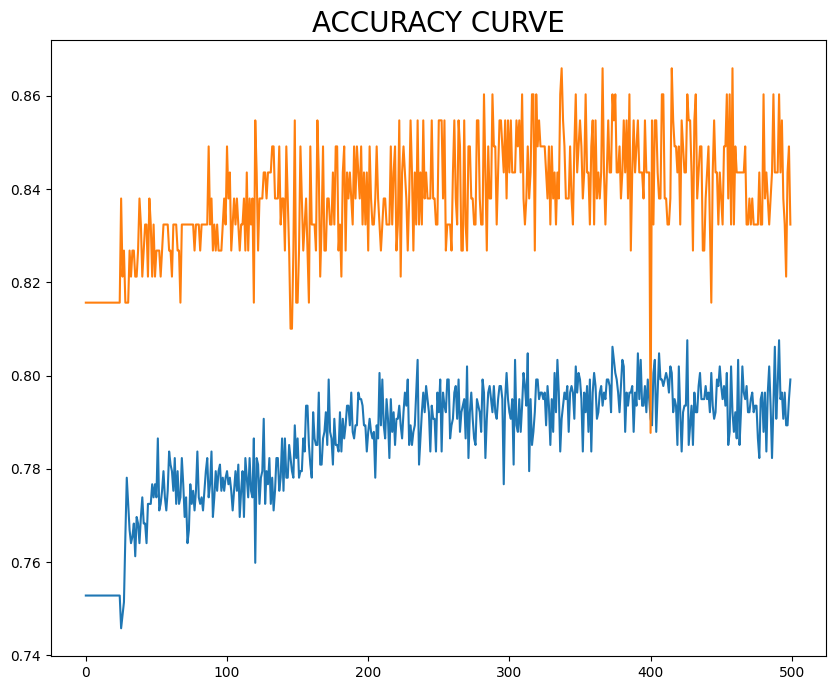

In [167]:
plt.figure(figsize=(10,8))
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

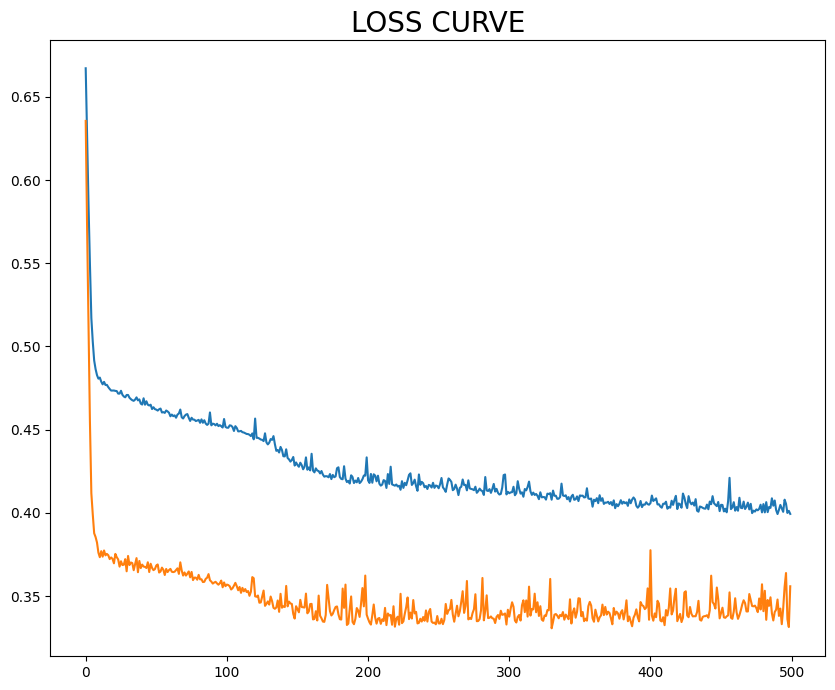

In [168]:
plt.figure(figsize=(10,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('LOSS CURVE',fontdict={'size':20})
plt.show()

In [169]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 6ms/step - loss: 0.3559 - accuracy: 0.8324


[0.3558611273765564, 0.8324022889137268]

In [170]:
model.save('./model',overwrite=True)

INFO:tensorflow:Assets written to: ./model/assets
